In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_matrix , classification_report

(<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>,
 <function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>)

In [50]:
url='wine.csv'
df= pd.read_csv(url)
df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [52]:
from sklearn.datasets import load_wine
wine=load_wine()
wine.keys()
x=wine['data']
y=wine['target']

print(x.shape)
print(y.shape)


(178, 13)
(178,)


In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(x,y, test_size = 0.2,random_state=42)

In [58]:
from sklearn.neighbors import KNeighborsClassifier


In [60]:

model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)

KNeighborsClassifier()

In [62]:
df=pd.DataFrame(x,
                columns=wine['feature_names'])
df['target']=y
df.sample()
                

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
12,13.75,1.73,2.41,16.0,89.0,2.6,2.76,0.29,1.81,5.6,1.15,2.9,1320.0,0


In [64]:
y_pred_prob = model.predict_proba(x_test)
y_pred_prob 

array([[0.2, 0.2, 0.6],
       [1. , 0. , 0. ],
       [0. , 0.2, 0.8],
       [1. , 0. , 0. ],
       [0. , 0.6, 0.4],
       [1. , 0. , 0. ],
       [0. , 0.4, 0.6],
       [0.4, 0.2, 0.4],
       [0.2, 0.4, 0.4],
       [0.6, 0.2, 0.2],
       [0.2, 0.2, 0.6],
       [0. , 0.2, 0.8],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.6, 0.4],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0.2, 0. , 0.8],
       [0. , 0.6, 0.4],
       [0. , 0.8, 0.2],
       [0. , 0.6, 0.4],
       [0. , 1. , 0. ],
       [0.2, 0. , 0.8],
       [0. , 0.8, 0.2],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0.4, 0. , 0.6],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ]])

In [68]:
y_pred=model.predict(x_test)
y_pred

array([2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       2, 1, 1, 1, 1, 2, 1, 0, 0, 1, 2, 0, 0, 0])

In [70]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

cm = confusion_matrix(y_test,y_pred)
cm

array([[12,  0,  2],
       [ 0, 11,  3],
       [ 2,  3,  3]], dtype=int64)

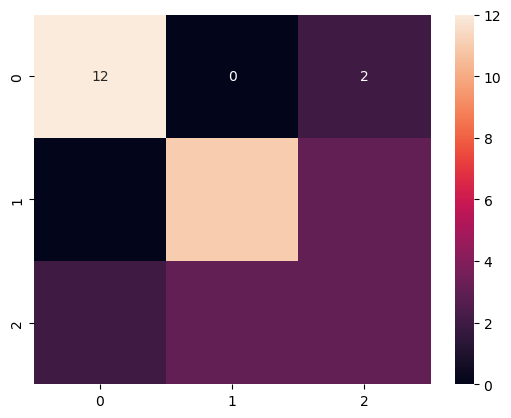

In [82]:
sns.heatmap(cm,annot=True,fmt='.2g')
plt.show()

In [80]:
plt.gray()
df.loc[5].values


array([1.42e+01, 1.76e+00, 2.45e+00, 1.52e+01, 1.12e+02, 3.27e+00,
       3.39e+00, 3.40e-01, 1.97e+00, 6.75e+00, 1.05e+00, 2.85e+00,
       1.45e+03, 0.00e+00])

<Figure size 640x480 with 0 Axes>

In [88]:
import time
max_score=0
all_score=[]
all_k=[]
for i in range(1,16):
    x_train, x_test,y_train,y_test=train_test_split(wine['data'],wine['target'], test_size = 0.2,random_state=42)
    model=KNeighborsClassifier(n_neighbors=i)
    
    model.fit(x_train,y_train)
    score=model.score(x_test,y_test)
    
    if score>max_score:
        max_score=score
       
    
        print(f'value of k is:{i} and score is{score}')
        display(clear=True)
    all_score.append(score) 
    all_k.append(i)
    time.sleep(1)

value of k is:3 and score is0.8055555555555556


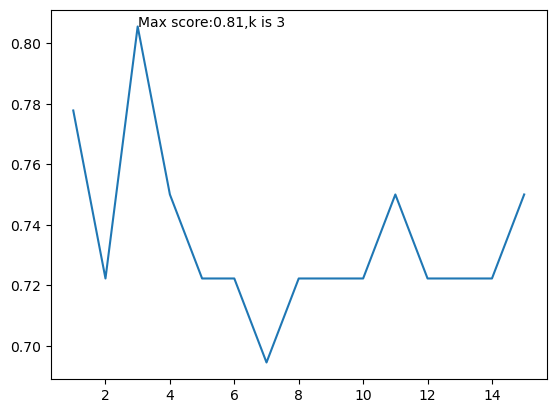

In [90]:
plt.plot(range(1,16),all_score)
k_index=np.argmax(all_score)
plt.annotate(text=f'Max score:{round(max(all_score),2)},k is {k_index+1}',
             xy=(k_index+1,max(all_score)))

plt.show()